In [17]:
import sys
import os
import json
import pandas as pd
import numpy as np
import random
import copy
from collections import Counter, defaultdict

# Visualization packages
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Append system path
sys.path = [p for p in sys.path if not p.endswith('../..')]  # Cleans duplicated '../..'
sys.path.insert(0, '../')  # This adds `src` to the path

from helpers import io, filters, constants
from analysis import util


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Loading

In [21]:
# data_summary_json = io.read_data_summary_json("../../data_summaries/video/")
data_summary_json = io.read_data_summary_json("../../data_summaries/video/test-0520")
all_constants = io.read_all_constants("../../constants/")
data_summary = filters.map_license_criteria(data_summary_json, all_constants)
print(len(data_summary_json))
print(all_constants.keys())

94
dict_keys(['LICENSE_CLASSES', 'CUSTOM_LICENSE_CLASSES', 'LANGUAGE_GROUPS', 'TASK_GROUPS', 'MODEL_GROUPS', 'CREATOR_GROUPS', 'CREATOR_COUNTRY_GROUPS', 'FORMATS', 'TOPICS', 'DOMAIN_GROUPS'])


# Test Data

Tests your data summary rows to see if all the values are in the constants. If not, it will print out the missing values, and which data collections they came from.

In [23]:
util.check_datasummary_in_constants_video(data_summary, all_constants)

No missing info for License Classes!

No missing info for Creator Groups!

No missing info for Creator Countries!

No missing info for Video Sources!



# Extract & Categorize Data

Runs through all rows of the data summary, and applies the constants files to categorize the licenses, creators, tasks, sources, languages, and other metadata, so it is ready for plotting.

In [24]:
all_info = util.extract_info(data_summary, all_constants)
commercial_info = {k: v for k, v in all_info.items() if v["License Use (DataProvenance)"] in ["commercial"]}
unspecified_info = {k: v for k, v in all_info.items() if v["License Use (DataProvenance)"] in ["unspecified"]}
ncao_info = {k: v for k, v in all_info.items() if v["License Use (DataProvenance)"] in ["non-commercial", "academic-only"]}

print(f"Total Rows = {len(all_info)}")
print(f"Total Rows w/ Commercially permissible licenses (according to DPI) = {len(commercial_info)}")
print(f"Total Rows w/ Unspecified licenses (according to DPI) = {len(unspecified_info)}")
print(f"Total Rows w/ Non-Commercial/Academic-Only licenses (according to DPI) = {len(ncao_info)}")

Total Rows = 94
Total Rows w/ Commercially permissible licenses (according to DPI) = 27
Total Rows w/ Unspecified licenses (according to DPI) = 37
Total Rows w/ Non-Commercial/Academic-Only licenses (according to DPI) = 30


# Plot License Breakdowns, by different Categories

In [25]:
util.plot_grouped_chart(
    {"Non-Commercial/\nAcademic": ncao_info, "Unspecified": unspecified_info, "Commercial": commercial_info},
    all_constants["CREATOR_GROUPS"],
    "Creator Groups",
    name_remapper=None,
    exclude_groups={},
    savename="langs_stacked-altair.json"
)

defaultdict(<class 'list'>, {'Industry Lab': [2, 6, 6], 'Startup': [1, 0, 0], 'Other': [2, 4, 0], 'Government': [1, 0, 0], 'Academic': [26, 28, 17], 'Research Group': [2, 5, 5], 'Corporation': [5, 9, 8]})


alt.LayerChart(...)

In [26]:

task_name_remapper = {
    "Short Text Generation": "Short Text Gen",
    "Bias & Toxicity Detection": "Bias/Toxic Detect",
    "Bias & Toxicicity Detection": "Bias/Toxic Detect",
    "Natural Language Inference": "NLI",
    "Commonsense Reasoning": "Commonsense Reas.",
    "Logical and Mathematical Reasoning": "Logic & Math",
}
util.plot_grouped_chart(
    {"Non-Commercial/\nAcademic": ncao_info, "Unspecified": unspecified_info, "Commercial": commercial_info},
    all_constants["CREATOR_COUNTRY_GROUPS"],
    "Creator Countries",
    name_remapper=task_name_remapper,
    exclude_groups={},
    savename="tasks_stacked-altair.json"
)

defaultdict(<class 'list'>, {'Chile': [0, 1, 0], 'India': [0, 0, 1], 'Croatia': [0, 0, 0], 'New Zealand': [0, 0, 0], 'UAE': [1, 0, 0], 'Poland': [0, 0, 0], 'Czechia': [0, 0, 0], 'Singapore': [2, 0, 0], 'Scotland': [0, 0, 0], 'Taiwan': [0, 0, 0], 'Italy': [0, 0, 0], 'Netherlands': [0, 1, 0], 'African Continent': [0, 0, 0], 'Australia': [0, 0, 0], 'Cambodia': [0, 0, 0], 'France': [2, 5, 4], 'United Kingdom': [4, 5, 1], 'Israel': [0, 0, 0], 'Finland': [0, 0, 0], 'Germany': [3, 3, 5], 'Norway': [0, 0, 0], 'Portugal': [0, 0, 0], 'Greece': [0, 0, 0], 'Iran': [0, 0, 0], 'Nigeria': [0, 0, 0], 'Spain': [1, 0, 0], 'Czech Republic': [0, 4, 0], 'Denmark': [0, 0, 0], 'Japan': [0, 1, 0], 'Colombia': [0, 0, 1], 'Belgium': [1, 1, 0], 'International/Other/Unknown': [0, 0, 0], 'Slovenia': [0, 0, 0], 'Switzerland': [1, 1, 1], 'Bulgaria': [0, 0, 0], 'Myanmar': [0, 0, 0], 'South Korea': [0, 1, 0], 'United States of America': [15, 22, 20], 'Canada': [3, 2, 2], 'Turkey': [0, 1, 0], 'Qatar': [0, 0, 0], 'Roman

alt.LayerChart(...)

In [28]:
excludes = ["Other", "Others", "Unsure", "Template Gen", "Human","Reviews", "Unknown", "ML Datasets", "Conversations", "Search Queries"]
util.plot_grouped_chart(
    {"Non-Commercial/\nAcademic": ncao_info, "Unspecified": unspecified_info, "Commercial": commercial_info},
    all_constants["DOMAIN_GROUPS"],
    "Domains",
    name_remapper=None,
    exclude_groups=excludes,
    savename="sources_stacked-altair.json"
)

defaultdict(<class 'list'>, {'Entertainment': [14, 21, 14], 'Code': [0, 0, 0], 'Exams': [0, 0, 0], 'General Web': [6, 4, 4], 'Models': [0, 0, 0], 'Template Generated': [0, 0, 0], 'Education': [0, 0, 0], 'Biomedical': [0, 0, 0], 'Commerce': [0, 0, 0], 'Governments': [0, 0, 0], 'Academic Papers': [0, 0, 0], 'Encyclopedias': [0, 0, 0], 'Books': [0, 0, 0], 'Legal': [0, 0, 0], 'Social Media': [1, 1, 5], 'News': [1, 0, 0]})


alt.LayerChart(...)

In [34]:
util.plot_grouped_time_chart(
    {"Non-Commercial/\nAcademic": ncao_info, "Unspecified": unspecified_info, "Commercial": commercial_info},
    "Preparation Times",
    disallow_repeat_dsetnames=True,
    savename="times_stacked-altair.json"
)

defaultdict(<class 'list'>, {'< 2013': [0, 0, 0], '2013': [0, 0, 0], '2014': [0, 0, 0], '2015': [0, 0, 0], '2016': [0, 0, 0], '2017': [0, 0, 0], '2018': [0, 0, 0], '2019': [0, 0, 0], '2020': [0, 0, 0], '2021': [0, 0, 0], '2022': [0, 0, 0], '2023': [0, 0, 0], '2024': [0, 0, 0]})


alt.LayerChart(...)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

Fraction of Total Licenses Requiring Attribution = 49.12%
Fraction of Total Licenses Requiring Share Alike = 7.02%


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

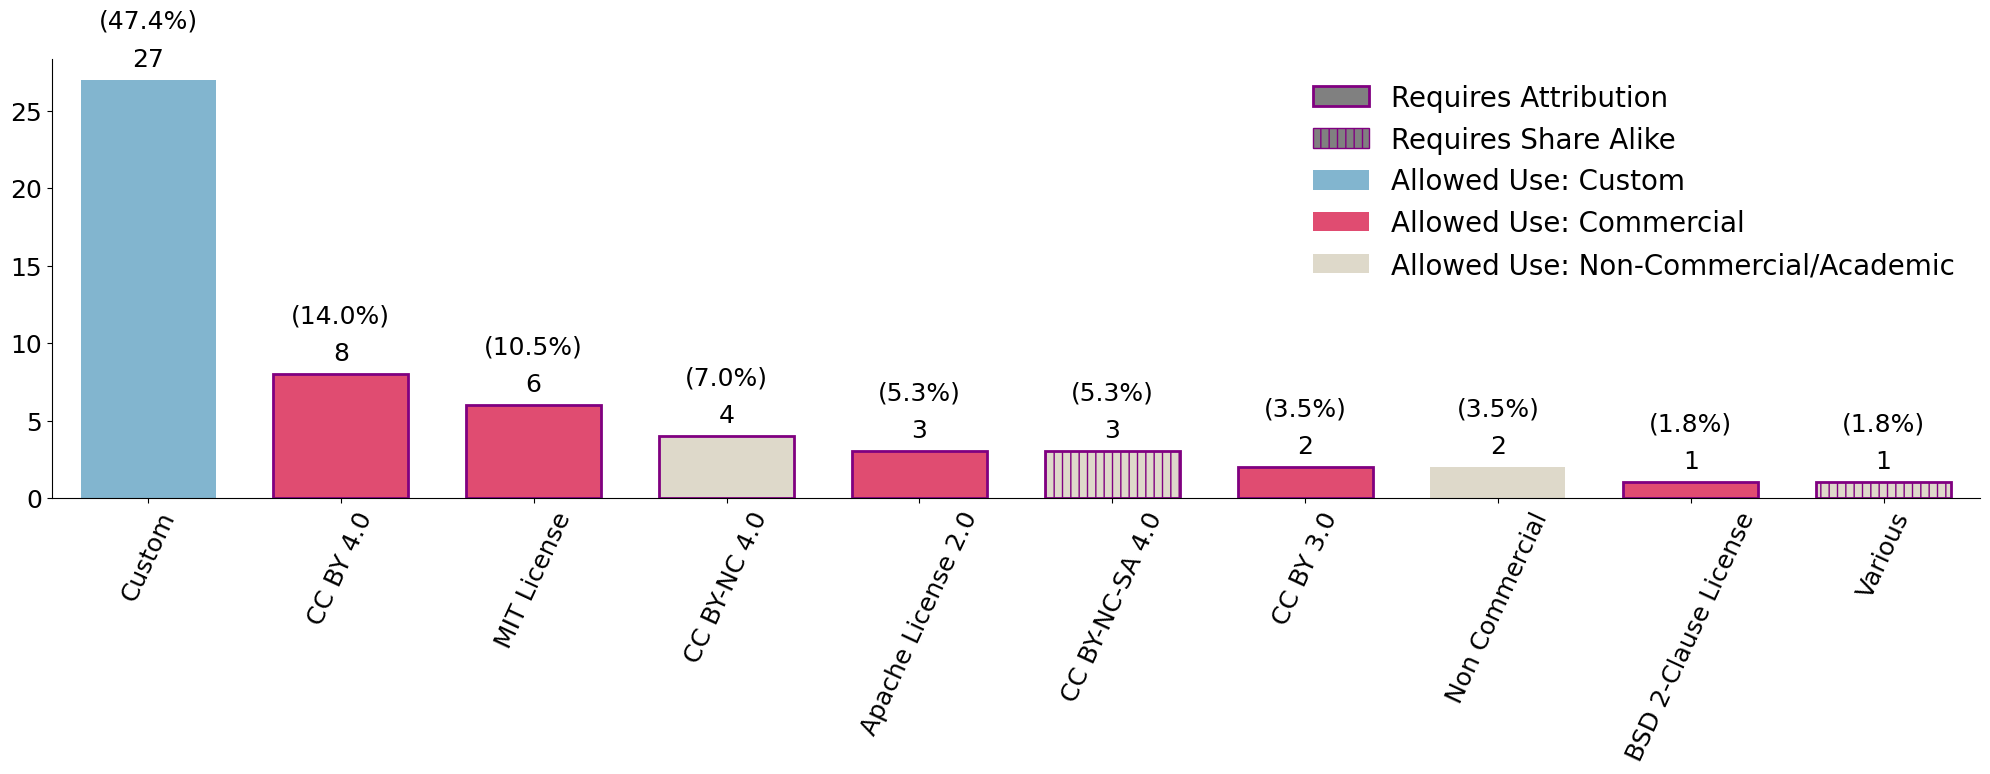

In [33]:
util.plot_license_breakdown(
    all_info, 
    all_constants["LICENSE_CLASSES"],
    disallow_repeat_dsetnames=True,
    savename="fig-test.png"
)